# Springboard Mini-Projects: EDA 3 - Hospital Readmissions
## By: AJ Goldstein (https://github.com/ajva1996)

## <span style="color:red">Hospital Readmissions Analysis and Recommendations </span>
#### <span style="color:red"> Questions of Interest:</span>
- <span style="color:red"> What flaws exist in the preliminary report? </span>
- <span style="color:red"> How can a statistically significant analysis be conducted? </span>
- <span style="color:red"> What recommendation adjustments should be made? </span>

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [72]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore')

In [73]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [74]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [75]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

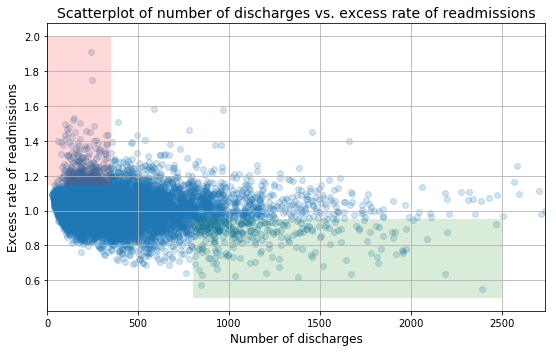

In [76]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

### NOTE: <span style="color:red"> My criticisms </span>of the preliminary report can be found <span style="color:red">below in red </span>

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
    - <span style="color:red"> where is the correlation coefficient or some sort of numerical evaluation here? </span>
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 
    - <span style="color:red"> how comprehensive are these shaded areas, really? I'm concerned about potential selection bias here. </span>

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 
    - <span style="color:red"> are these two metrics statistically significant? where's the hypothesis test proving it? </span>
    - <span style="color:red"> what if we split on different values between 100 & 1000? </span>

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
    -  <span style="color:red"> STATISTICALLY significant though? </span>
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
    - <span style="color:red"> this conclusion is just completely unfounded. nowhere is hospital size being proven as the main factor contributing to readmission rate.</span>
    - <span style="color:red"> Is # of discharges always correlated with size?</span>

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
    - <span style="color:red"> The cutoff on what's considered small seems to keep changing here... </span>
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
    - <span style="color:red"> How will grouping smaller sinking sailboats together lead to a better ship or crew? Seems to me like you'll just have a big ol' Titanic on your hands... </span>

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### QUESTION #1: Do you agree with the above analysis and recommendations? Why or why not?

### <span style="color:red"> ANSWER #1: </span>
#### <span style="color:red"> No, I do not agree with the analysis or recommendations above. Here are 5 reasons why: </span>

<ol>

<li> A proper <span style="color:red"> hypothesis test was not conducted </span> to determine the statistical significance of readmission rate across different hospital sizes.

<li> The numerical <span style="color:red"> relationship was simply "eyeballed" </span> between number of discharges and rate of readmissions. There was no correlation coefficient or numerical evaluation calculated to confirm initial observations.

<li> The <span style="color:red"> conclusion is completely unfounded </span> around hospital size lacking resources </span> There's no evidence that more resources would resolve this issue.

<li> A close <span style="color:red"> relationship is implicitly implied </span> between hospital size and number of discharges. However, there's no evidence presented that this is always the case.

<li> The <span style="color:red"> cutoff changes throughout </span> of what defines a small hospital (e.g. 100, 1000, 300 etc.)

### QUESTION #2: Conduct a statistically sound analysis
#### 2.1) Check for normality of distributions
#### 2.2) Setup an appropiate hypothesis test
#### 2.3) Report the observed p-value value,  statistical significance for alpha = 0.01

In [77]:
from scipy.stats import normaltest
import seaborn as sns

### 2.1: Check for normality of distributions

In [78]:
def check_significance(p_val, alpha):
    if p_val < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

In [79]:
def normal_hypoth_test(data, alpha):
    
    # calculate statistic & p-value
    statistic, p_val = normaltest(df['Number of Discharges'])
    print('chi-square statistic:',statistic)
    print('p value =',p_val)
    # check significance
    check_significance(p_val, alpha)
    
    return statistic, p_val

In [80]:
df = clean_hospital_read_df
df.head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


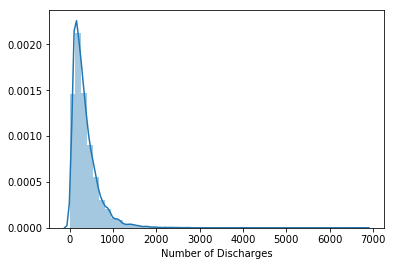

In [81]:
ax = sns.distplot(df['Number of Discharges'])

In [82]:
# conduct normal test on number of discharges
stat, p_val = normal_hypoth_test(df['Number of Discharges'], alpha=0.05)

('chi-square statistic:', 8412.4477527445197)
('p value =', 0.0)
The null hypothesis can be rejected


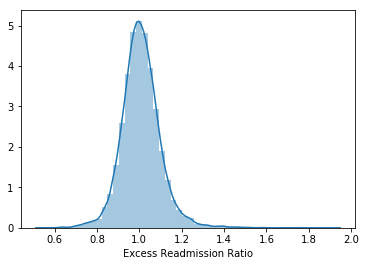

In [83]:
ax = sns.distplot(df['Excess Readmission Ratio'].dropna())

In [84]:
# conduct normal test on number of discharges
stat, p_val = normal_hypoth_test(df['Excess Readmission Ratio'].dropna(), alpha=0.05)

('chi-square statistic:', 8412.4477527445197)
('p value =', 0.0)
The null hypothesis can be rejected


### <span style="color:red"> NOTE: Both distributions are not normal (skewed-right)</span>
#### However, we can proceed with t-test because it's robust to the normality assumption.

### 2.2: Setup an appropiate hypothesis test

### <span style="color:red"> Test Type: t-test for the correlation coefficient, pho </span>
- ####  because we are investigating the existence of a linear relationship between two populations

### <span style="color:red"> Null Hypothesis: pho = 0 </span>
- ####  because it is assumed that there is no relationship until proven otherwise

### <span style="color:red"> Alternative Hypothesis: pho != 0 </span>
- ####  because it could be a positive or negative correlation

### 2.3: Report the observed p-value value,  statistical significance for alpha = 0.01

In [85]:
# conduct hypothesis test for pearson correlation coefficient
from scipy import stats
discharges = df[df['Number of Discharges'] > 0]['Number of Discharges']
readmission = df[df['Number of Discharges'] > 0]['Excess Readmission Ratio']
pho, p_val = stats.pearsonr(discharges, readmission)

print('correlation coefficient:',pho)
print('p value =',p_val)
check_significance(p_val, alpha=0.01)

('correlation coefficient:', -0.097397943510793533)
('p value =', 1.222547377680967e-25)
The null hypothesis can be rejected


### <span style="color:red"> There is a statistically significant correlation (p-value = 1.22 e-25) for a hospital's number of discharges and their excess readmission ratio.</span>

### QUESTION #3: Discuss statistical significance vs. practical significance. Do they differ here?

### <span style="color:red"> ANSWER #3: </span>
#### <span style="color:red"> Statistical significance is solely a factor of p-value, while practical significance accounts accounts for "effect size".</span>
- This is an important difference because it's easy to find statistical significance by simply inflating our test's sample size (n).
- Effect size emphasises the size of the difference rather than confounding this with sample size.
- Effect size allows us to move beyond the simplistic, 'Does it work or not?' to the far more sophisticated, 'How well does it work in a range of contexts?' 

<img src="effect_size.png" alt="Drawing" style="width: 150px;" align= "left">

#### <span style="color:red"> In this case, we have statistical signicance but not practical significance. </span>
- The p-value = 1.22 e-25, but the effect size for our correlation coefficient (r = -0.097) is considered very small (aka "insignificant")

### QUESTION #4: How does this change the recommendation?

### <span style="color:red"> ANSWER #4: </span>
#### <span style="color:red"> This changes the recommendation to the client by forcing us to retract the assumption that excess readmission can be attributed to hospital size. </span>
- Moreover, it's not evident that a hospital's readmission rate can be accounted for by the amount of "resources" the hospital has.
- Thus, <span style="color:red"> it's no longer relevant to recommended that hospitals demonstrate upgraded resource allocation and/or consolidate their facilities. </span>

### QUESTION #5: Critically evaluate & reproduce the plot above.
#### 5.1) What are the advantages and disadvantages of using this plot to convey information?
#### 5.2) Construct another plot that conveys the same information in a more direct manner.

#### <span style="color:red"> Advantages:</span>
    - visually appealing (green and red shaded regions)
    - captures the density of the point distribution across both the x & y axis
####  <span style="color:red"> Disadvantages:</span>
    - no "correlation coefficient" or relationship shown
    - no indication of the distribution of each individual statistic

### <span style="color:red">ANSWER #5: New Plot</span>

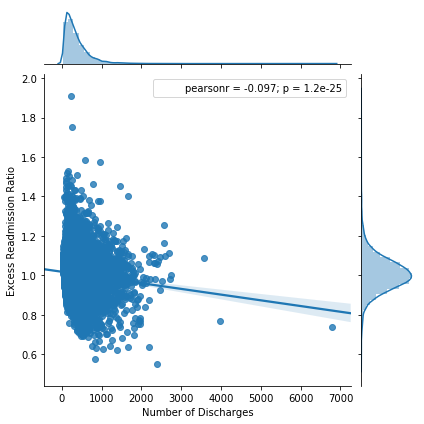

In [86]:
sns.jointplot(discharges, readmission, kind='reg');

### <span style="color:red"> this jointplot conveys information in a more direct manner by:</span>
- accounting for each of the advantages above
- making up for each of the disadvantages